In [ ]:
from chyk import *
handcalcs.set_option("param_columns", 6)
from math import degrees as r2d
from math import radians as d2r

In [3]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ------- -------------------------------- 7.6/38.8 MB 47.1 MB/s eta 0:00:01
   -------- ------------------------------- 8.7/38.8 MB 41.3 MB/s eta 0:00:01
   -------- ------------------------------- 8.7/38.8 MB 41.3 MB/s eta 0:00:01
   -------- ------------------------------- 8.7/38.8 MB 41.3 MB/s eta 0:00:01
   -------- ------------------------------- 8.7/38.8 MB 41.3 MB/s eta 0:00:01
   -------- ------------------------------- 8.7/38.8 MB 41.3 MB/s eta 0:00:01
   -------- ------------------------------- 8.7/38.8 MB 41.3 MB/s eta 0:00:01
   ---------- ----------------------------- 10.5/38.8 MB 6.7 MB/s eta 0:00:05
   ----------- ---------------------------- 11.5/38.8 MB 6.2 MB/s eta 0:00:05
   ------------- -------------------------- 12.8/38.8 MB 6.1 MB/s eta 0:00:05
   -------------- ------------------------- 14.2/38.8 MB 6.1 MB/s eta 0:00:05
   ---------------- ----------------------- 15.7/38.8 MB 6.2 MB/s eta 0:

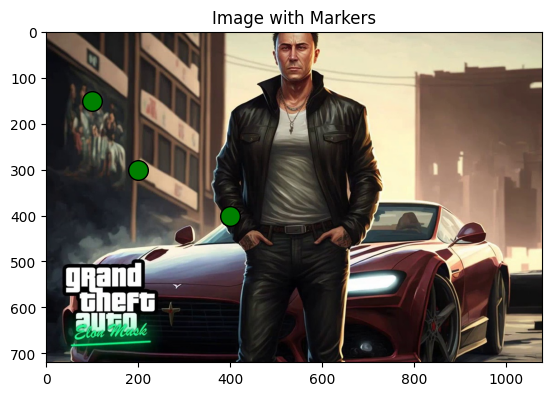

In [13]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import cv2

def mapgen(image_path, markers, marker_color='green', marker_size=200):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image at path {image_path} not found.")
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display the image
    plt.imshow(image_rgb)
    # plt.axis('on')  # Turn on the axis for reference
    
    # Add markers
    for marker in markers:
        x, y = marker  # Unpack marker coordinates
        plt.scatter(x, y, c=marker_color, s=marker_size, edgecolor='black', label='Marker')

    # Adjust layout and display the image with markers
    plt.title("Image with Markers")
    plt.show()

markers = [(100, 150), (200, 300), (400, 400)]  # Replace with your marker coordinates
mapgen('img/a.jpg', markers)


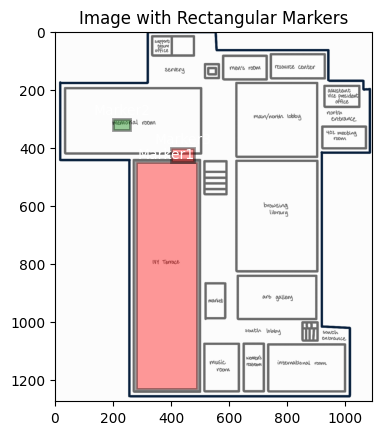

In [57]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import cv2
import os

def mapgen(image_path, markers_file, marker_color='green', text_color='white', edge_color='black'):
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image at path {image_path} not found.")
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Marker File
    if not os.path.exists(markers_file):
        with open(markers_file, 'w') as f:
            f.write('"name",x_cord,y_cord,dimension_x,dimension_y,state\n')  # Add header
    markers = []
    with open(markers_file, 'r') as f:
        lines = f.readlines()[1:]
        for line in lines:
            parts = line.strip().split(',')
            name = parts[0].strip('"')
            x, y = int(parts[1]), int(parts[2])
            dim_x, dim_y = int(parts[3]), int(parts[4])
            state = int(parts[5])
            markers.append((name, x, y, dim_x, dim_y, state))

    # Update the state of each marker in the file
    updated_markers = []
    for marker in markers:
        name, x, y, dim_x, dim_y, state = marker
        new_state = 1 - state  # Toggle state between 0 and 1
        updated_markers.append((name, x, y, dim_x, dim_y, new_state))

    # Write updated markers back to the file
    with open(markers_file, 'w') as f:
        f.write('"name",x_cord,y_cord,dimension_x,dimension_y,state\n')  # Write header
        for marker in updated_markers:
            f.write(f'"{marker[0]}",{marker[1]},{marker[2]},{marker[3]},{marker[4]},{marker[5]}\n')

    # Display the image
    plt.imshow(image_rgb)
    ax = plt.gca()  # Get current axis

    # Add markers as rectangles
    for marker in updated_markers:
        name, x, y, dim_x, dim_y, state = marker
        rect = Rectangle((x, y), dim_x, dim_y, linewidth=2, edgecolor=edge_color, facecolor=marker_color if state == 1 else 'red', alpha=0.4)
        ax.add_patch(rect)
        plt.text(x + dim_x / 2, y - 5, name, color=text_color, ha='center', va='bottom', fontsize=10)

    # Adjust layout and display the image with markers
    plt.title("Image with Rectangular Markers")
    plt.axis('on')
    plt.show()

# Example usage
image_path = 'img/willard.png'  # Replace with your image path
markers_file = 'willard.txt'  # Marker file in the same directory
mapgen(image_path, markers_file)


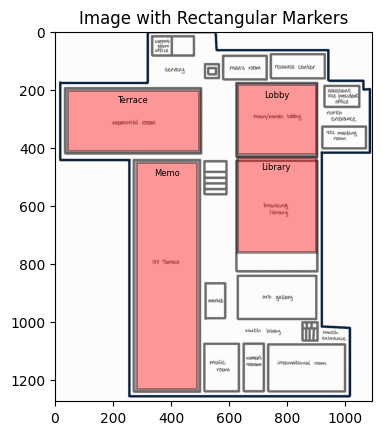

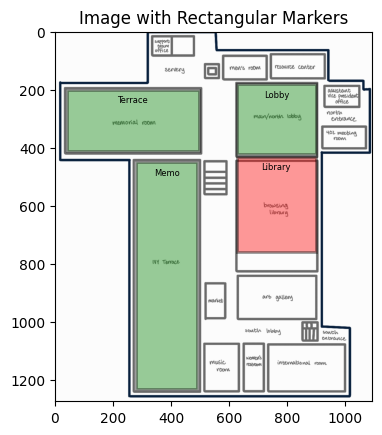

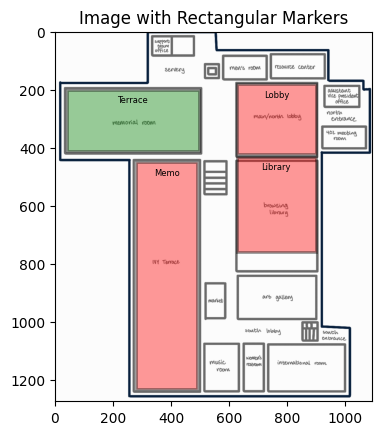

In [110]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import cv2
import os

def mapgen(image_path, markers_file):
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image at path {image_path} not found.")
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    if not os.path.exists(markers_file):
        with open(markers_file, 'w') as f:
            f.write('"name",x_cord,y_cord,dimension_x,dimension_y,state\n')
    markers = []
    with open(markers_file, 'r') as f:
        lines = f.readlines()[1:]
        for line in lines:
            parts = line.strip().split(',')
            name = parts[0].strip('"')
            x, y = int(parts[1]), int(parts[2])
            dim_x, dim_y = int(parts[3]), int(parts[4])
            state = int(parts[5])
            markers.append((name, x, y, dim_x, dim_y, state))
    plt.imshow(image_rgb)
    ax = plt.gca()
    for marker in markers:
        name, x, y, dim_x, dim_y, state = marker
        rect = Rectangle((x, y), dim_x, dim_y, linewidth=2, edgecolor='black', facecolor='green' if state == 1 else 'red', alpha=0.4)
        ax.add_patch(rect)
        plt.text(x + dim_x / 2, y + 20, name, color='black', ha='center', va='top', fontsize=6)
    plt.title("Image with Rectangular Markers")
    plt.axis('on')
    plt.show()

def toggleon(*indices, markers_file='willard.txt'):
    with open(markers_file, 'r') as f:
        lines = f.readlines()
    header = lines[0]
    markers = [line.strip().split(',') for line in lines[1:]]
    for index in indices:
        if 0 < index <= len(markers):
            markers[index - 1][-1] = '1'
    with open(markers_file, 'w') as f:
        f.write(header)
        for marker in markers:
            f.write(','.join(marker) + '\n')

def toggleoff(*indices, markers_file='willard.txt'):
    with open(markers_file, 'r') as f:
        lines = f.readlines()
    header = lines[0]
    markers = [line.strip().split(',') for line in lines[1:]]
    for index in indices:
        if 0 < index <= len(markers):
            markers[index - 1][-1] = '0'
    with open(markers_file, 'w') as f:
        f.write(header)
        for marker in markers:
            f.write(','.join(marker) + '\n')

image_path = 'img/willard.png'  # Replace with your image path
markers_file = 'willard.txt'  # Marker file in the same directory
toggleoff(1,2,3)
mapgen(image_path, markers_file)
toggleon(1,2,3)
mapgen(image_path, markers_file)
toggleoff(3,1)
mapgen(image_path, markers_file)

